# Made to Save Data Visualization Project

## Today we are looking at a favorite topic for many, candy! The following code and visualizations were done in Python 3.9 within a Jupyter Notebook

### Imports

The pandas library was used for some small data manipulation/cleaning and the seaborn library was used for visualizing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Data Processing

Pandas to read in the data

In [2]:
df = pd.read_csv('candy-data.csv')

Quick glance at data shows some issues with formatting and difference in percent (decimal vs whole)


In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


The following code created a uniform percent structure

In [4]:
df['pricepercent']=df['pricepercent']*100
df['sugarpercent']=df['sugarpercent']*100

Changed formatting for special character to an apostrophe


In [5]:
df = df.replace({'competitorname': {'Õ': "'"}}, regex=True)

In [6]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,73.199999,86.000001,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60.399997,51.099998,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,1.100000,11.600000,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,1.100000,51.099998,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,90.600002,51.099998,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,22.000000,11.600000,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,9.300000,11.600000,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,31.299999,31.299999,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,18.600000,26.699999,41.904308


### Visualizations

Let's take a look at the candy! First stop will be ranking the win percent by candy name. The red line marks the 50% point

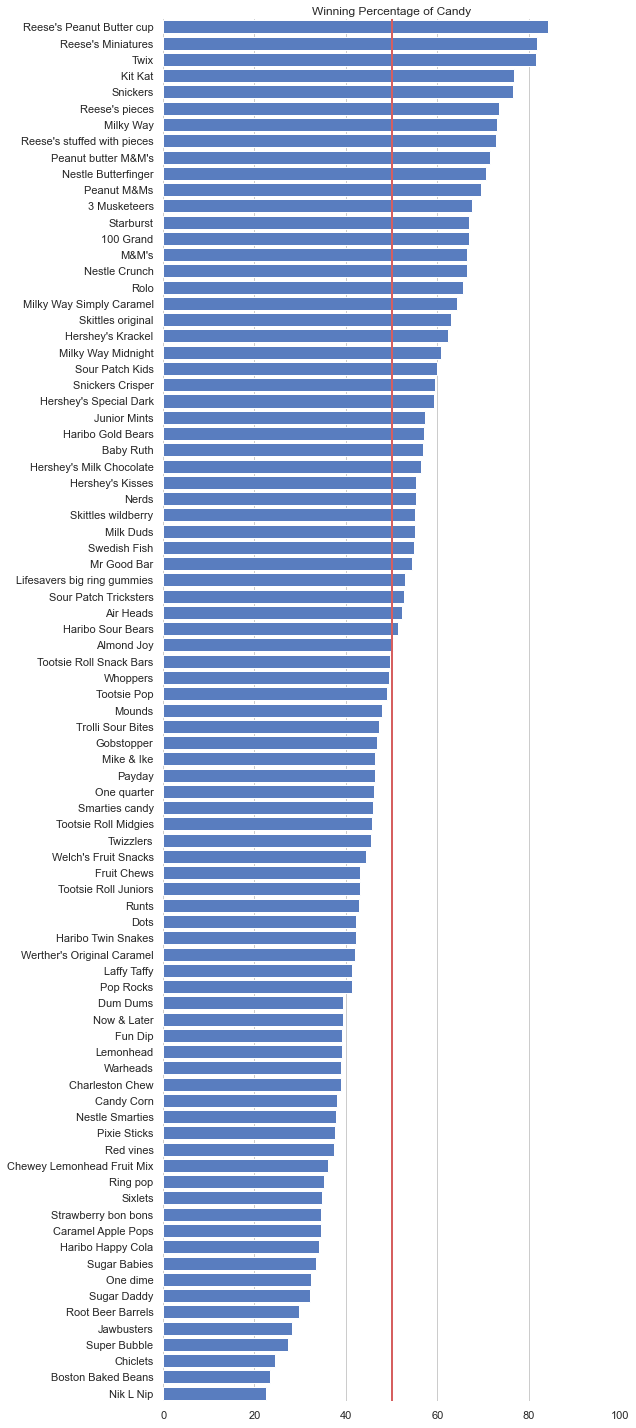

In [7]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 20))
sns.set_color_codes("muted")
candy=sns.barplot(x="winpercent", y="competitorname", data=df, color="b", order=df.sort_values('winpercent', ascending=False).competitorname)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Winning Percentage of Candy")
ax.xaxis.set_label_position('top') 
sns.despine(left=True, bottom=True)
candy.axvline(50, linewidth=2, color='r')
plt.tight_layout()

People love Reese's! 

After an inspection of the data it looks that many of the top candies seem to include chocolate and other components. To further identify if components play a role in winning percent lets add a column that adds up a candy's components to the dataframe.

Components:
- chocolate
- fruity
- caramel
- peanutyalmondy
- nougat
- crispedricewafer

In [8]:
components = df.iloc[:,1:7]
components_sum = np.sum(components, axis=1)
df['components_sum'] = components_sum
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,components_sum
0,100 Grand,1,0,1,0,0,1,0,1,0,73.199999,86.000001,66.971725,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60.399997,51.099998,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,1.100000,11.600000,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,1.100000,51.099998,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,90.600002,51.099998,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,22.000000,11.600000,45.466282,1
81,Warheads,0,1,0,0,0,0,1,0,0,9.300000,11.600000,39.011898,1
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,31.299999,31.299999,44.375519,1
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,18.600000,26.699999,41.904308,1


Before we do anything else, let's take a look at a correlation heatmap

<AxesSubplot:>

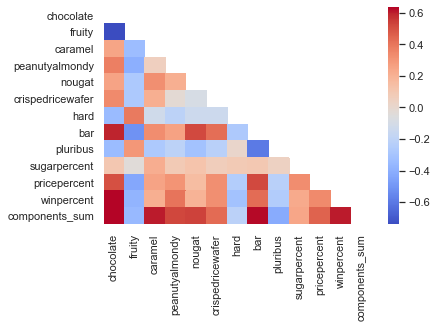

In [9]:
corrmat = df.corr()
mask_triangle=np.triu(np.ones(corrmat.shape)).astype(bool)
sns.heatmap(corrmat, mask=mask_triangle, cmap="coolwarm")

#source for triangle heatmap - https://gist.github.com/ka-steve/25aa081d17c24f5f5f765216a35b8b3b

Looks like we were on to something with chocolate and additional components playing a factor in the winning percentage.

Let's take a closer look at chocolate and the additional components to chocolate by winning percentage

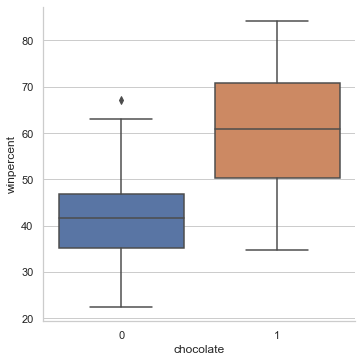

In [10]:
sns.catplot(x='chocolate',y='winpercent',data=df,kind='box')

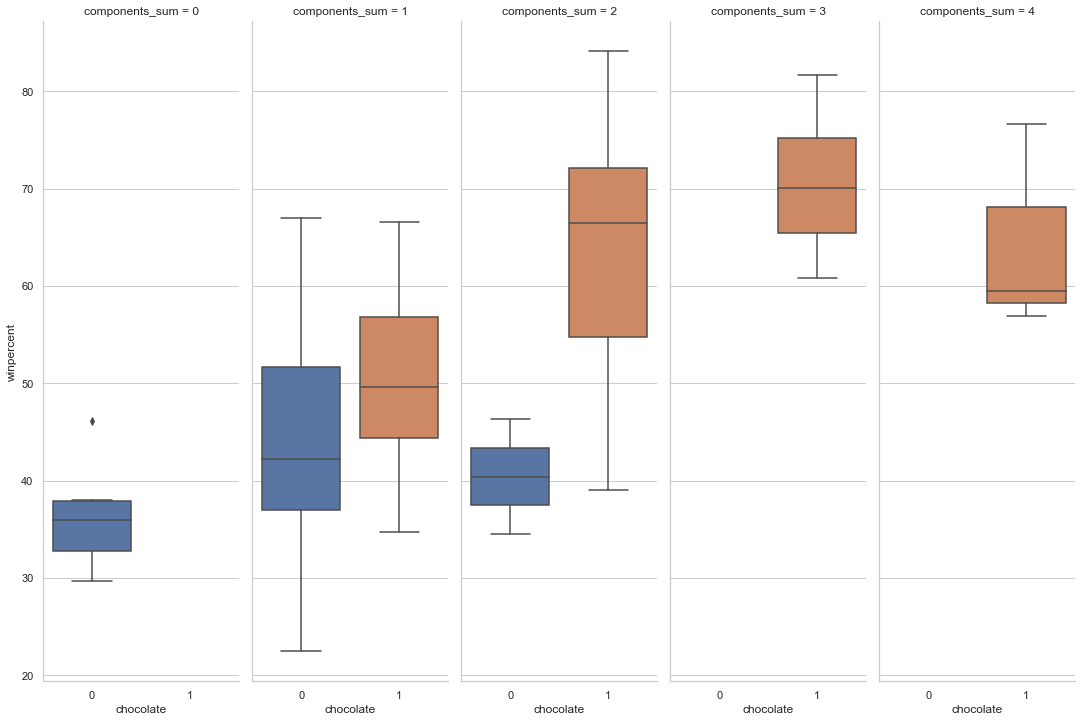

In [11]:
sns.catplot(x='chocolate',y='winpercent',data=df,kind='box',col='components_sum',height=10, aspect=.3)

People like chocolate over other candies as shown in the top boxplot, but seem to **love** chocolate when you add in some additional components! This is represented by the last 3 boxplots on the second set of boxplots where chocolate with additional components show a higher win percentage

Let's take a look at the additional components in the style of the original ranking barplots.

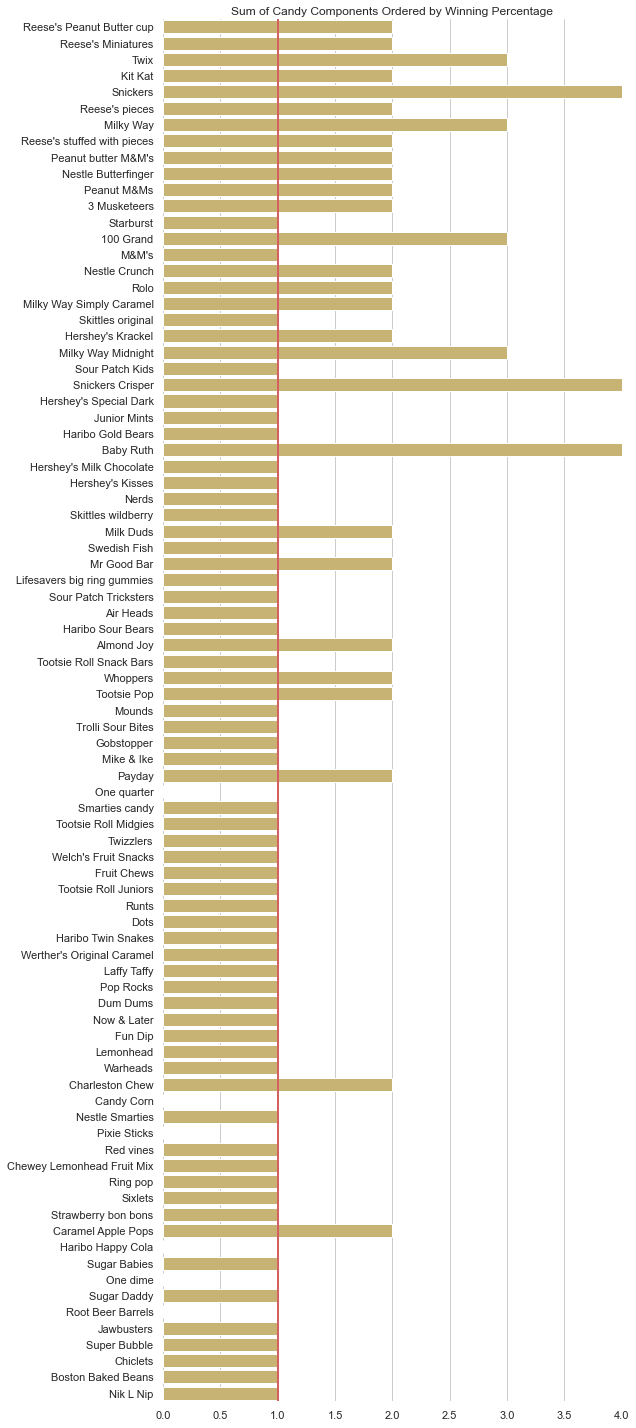

In [12]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(9, 20))
sns.set_color_codes("muted")
candy=sns.barplot(x="components_sum", y="competitorname", data=df, color="y", order=df.sort_values('winpercent', ascending=False).competitorname)
ax.set(xlim=(0, 4), ylabel="",
       xlabel="Sum of Candy Components Ordered by Winning Percentage")
ax.xaxis.set_label_position('top') 
sns.despine(left=True, bottom=True)
candy.axvline(1, linewidth=2, color='r')
plt.tight_layout()

You can see that many of the top candies have additional components (anything past the red line has more than one component)

Now lets look at whether high sugar content has a role to play

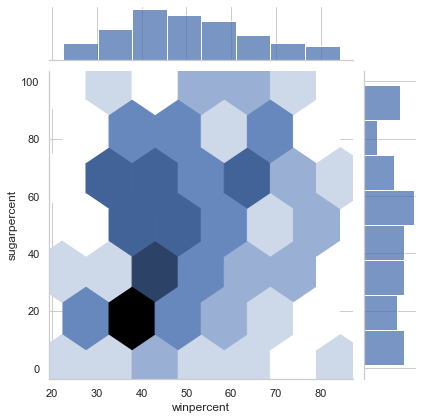

In [13]:
sns.jointplot(x='winpercent',y='sugarpercent',data=df,kind='hex')

Looking at the jointplot above, it doesnt look like a higher sugar content necessarily means a winning candy.

Let's do the same thing for price

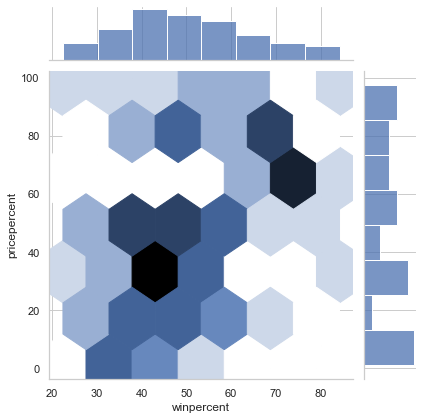

In [14]:
sns.jointplot(x='winpercent',y='pricepercent',data=df,kind='hex')

Like sugar content, it doesnt look like a higher priced candy necessarily means a winning candy.

Looking back at our heatmap it looks like fruit candy and hard candy score lower, let’s take a look at some boxplots to see.

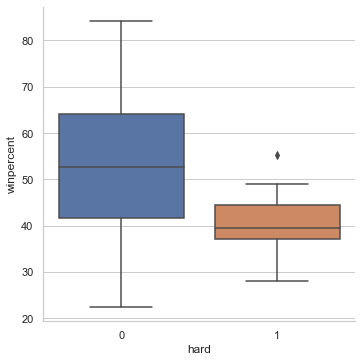

In [15]:
sns.catplot(x='hard',y='winpercent',data=df,kind='box')

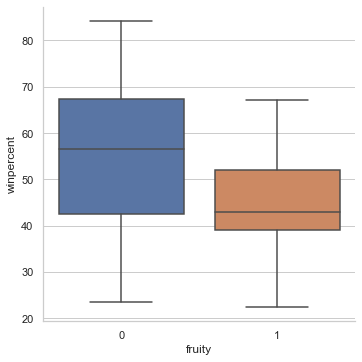

In [16]:
sns.catplot(x='fruity',y='winpercent',data=df,kind='box')

It definitely looks like hard candies are not a favorite in this matchup and fruity flavors look to score lower overall as well.

### Wrap Up

More time could be spent investigating candy (but you might get too hungry) so let's summarize. 

People love their chocolate and chocolatey candies regardless of the price/sugar content. Hard candies aren't that popular these days and fruitiness can't topple chocolate!


# Happy eating!

<img src="peanutbutter.jpg" width="400px" align="left">